In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


class_label =  os.listdir(f'hw5_data/train/')

In [2]:
def DataLoader(path, standardize=False):
    img_list = np.zeros([256,1])
    label_list = []
    num_img = 0
    for classes in class_label:
        for img in os.listdir(f'hw5_data/{path}/{classes}'):
            if img.endswith('.jpg'):
                label_list.append(classes)
                original = cv2.imread(f'hw5_data/{path}/{classes}/{img}', cv2.IMREAD_GRAYSCALE)
                
                if standardize:
                    mean = np.mean(original)
                    stds = np.std(original)
                    original = (original-mean) / (stds+1e-6)
                    
                resized_img = cv2.resize(original, (16, 16), interpolation=cv2.INTER_CUBIC).reshape(-1,1)
                img_list = np.hstack([img_list, resized_img])
                num_img += 1
    img_list = img_list.T[1:,:]
    return img_list, label_list, num_img

In [3]:
from scipy.spatial.distance import cdist

def create_dict():
    dic = {}
    for name in set(train_label):
        dic[name] = 0
    return dic


def KNN(k):
    
    acc = 0
    distance = cdist(train_img, test_img)

    for i in range(num_test):
        dic = create_dict()
        idx = np.argsort(distance[:,i])[:k]

        for j in idx:
            dic[train_label[j]] += 1

        if max(dic, key=dic.get) == test_label[i]:
            acc += 1
            
    return acc/num_test

In [4]:
def Standardize_whole_data(train, test):
    total_mean = np.mean(train)
    total_std = np.std(train)
    train = (train-total_mean) / total_std

    total_mean = np.mean(test)
    total_std = np.std(test)
    test = (test-total_mean) / total_std
    
    return train, test

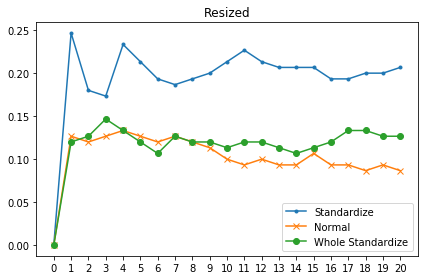

In [5]:
train_img, train_label, num_train = DataLoader('train', standardize=True)
test_img, test_label, num_test = DataLoader('test', standardize=True)

score_std = [0]
for i in range(1,21):
    score_std.append(KNN(i))
    
train_img, train_label, num_train = DataLoader('train', standardize=False)
test_img, test_label, num_test = DataLoader('test', standardize=False)


score = [0]
for i in range(1,21):
    score.append(KNN(i))
    
    
train_img, train_label, num_train = DataLoader('train', standardize=False)
test_img, test_label, num_test = DataLoader('test', standardize=False)
train_img, test_img = Standardize_whole_data(train_img, test_img)

score_whone_std = [0]
for i in range(1,21):
    score_whone_std.append(KNN(i))    

    
plt.plot(score_std, label='Standardize', marker='.')
plt.plot(score, label='Normal', marker='x')
plt.plot(score_whone_std, label='Whole Standardize', marker='o')
plt.xticks(np.arange(0, 21, step=1))
plt.legend(loc=0)
plt.title('Resized')
plt.tight_layout()

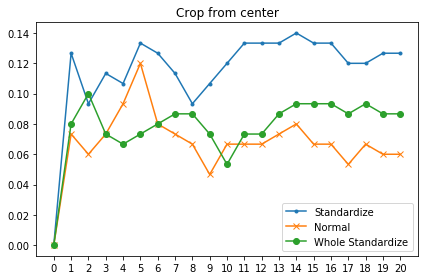

In [6]:
def DataLoader(path, standardize=False):
    img_list = np.zeros([256,1])
    label_list = []
    num_img = 0
    for classes in class_label:
        for img in os.listdir(f'hw5_data/{path}/{classes}'):
            if img.endswith('.jpg'):
                label_list.append(classes)
                original = cv2.imread(f'hw5_data/{path}/{classes}/{img}', cv2.IMREAD_GRAYSCALE)
                
                if standardize:
                    mean = np.mean(original)
                    stds = np.std(original)
                    original = (original-mean) / (stds+1e-6)
                    
                h, w = original.shape
                resized_img = original[h//2-8:h//2+8, w//2-8:w//2+8].reshape(-1,1)
                img_list = np.hstack([img_list, resized_img])
                num_img += 1
    img_list = img_list.T[1:,:]
    return img_list, label_list, num_img



train_img, train_label, num_train = DataLoader('train', standardize=True)
test_img, test_label, num_test = DataLoader('test', standardize=True)

score_std = [0]
for i in range(1,21):
    score_std.append(KNN(i))
    
train_img, train_label, num_train = DataLoader('train', standardize=False)
test_img, test_label, num_test = DataLoader('test', standardize=False)


score = [0]
for i in range(1,21):
    score.append(KNN(i))
    
    
train_img, train_label, num_train = DataLoader('train', standardize=False)
test_img, test_label, num_test = DataLoader('test', standardize=False)
train_img, test_img = Standardize_whole_data(train_img, test_img)

score_whone_std = [0]
for i in range(1,21):
    score_whone_std.append(KNN(i))    

    
plt.plot(score_std, label='Standardize', marker='.')
plt.plot(score, label='Normal', marker='x')
plt.plot(score_whone_std, label='Whole Standardize', marker='o')
plt.xticks(np.arange(0, 21, step=1))
plt.legend(loc=0)
plt.title('Crop from center')
plt.tight_layout()